# ✌️ 학습 알고리즘으로 TwoLayerNet 학습시키기

### 📥 Import

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# 한글폰트 설정
import matplotlib as mpl
mpl.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
print(f'현재 작업 디렉토리: "{os.getcwd()}"')

from common.functions import *
from common.gradient import numerical_gradient
from dataset.mnist import load_mnist

현재 작업 디렉토리: "g:\zer0ken\ms-ai-school\neural-net\ch03 신경망 학습"


### 🧵 신경망

In [3]:
class TwoLayerNet:
    def __init__(self, input_size=784, hidden_size=50, output_size=10, weight_init_std=0.01):
        self.params = {
            'W1': weight_init_std * np.random.randn(input_size, hidden_size),
            'b1': np.zeros(hidden_size),
            'W2': weight_init_std * np.random.randn(hidden_size, output_size),
            'b2': np.zeros(output_size)
        }
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy_ = np.sum(y == t) / float(x.shape[0])
        return accuracy_
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {
            'W1': numerical_gradient(loss_W, self.params['W1']),
            'b1': numerical_gradient(loss_W, self.params['b1']),
            'W2': numerical_gradient(loss_W, self.params['W2']),
            'b2': numerical_gradient(loss_W, self.params['b2'])
        }
        
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)
        
        return grads

### ✍️ MNIST 데이터셋으로 학습

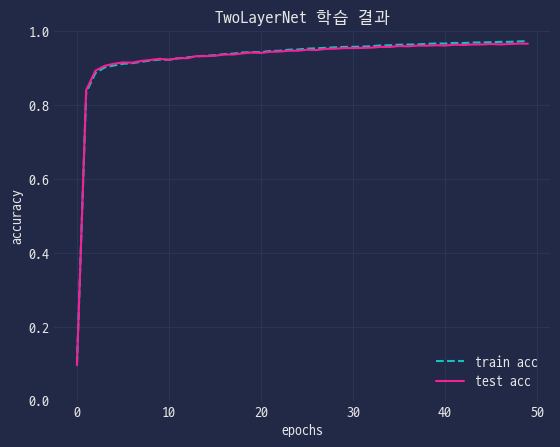

In [5]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

iters_num = 30000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
hidden_size = 350

network = TwoLayerNet(hidden_size=hidden_size)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
last_test_acc = 0.0
    
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network. loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f'#{i:-6d} | {train_acc=:.6f} | test_acc= {last_test_acc:.6f} >>> {test_acc:.6f}', end='\r')
        last_test_acc = test_acc

x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc', linestyle='--')
plt.plot(x, test_acc_list, label='test acc',)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.title('TwoLayerNet 학습 결과')
plt.show()